# CSC3831 Final Assessment - Part I: Data Engineering



In [3]:
# Loading in standard packages for analysis, feel free to add an extra packages you'd like to use here
import random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
#added matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# for using in KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
# for MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# for regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Loading in the corrupted dataset to be used in analysis and imputation
houses_corrupted = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)
# Remove an artifact from the dataset
houses_corrupted.drop(["Unnamed: 0"], axis=1, inplace=True)

Above we've loaded in a corrupted version of a housing dataset. The anomalies need to be dealt with and missing values imputed.

### 1. Data Understanding [7]
- Perform ad hoc EDA to understand and describe what you see in the raw dataset
  - Include graphs, statistics, and written descritpions as appropriate
  - Any extra information about the data you can provide here is useful, think about performing an analysis (ED**A**), what would you find interesting or useful?
- Identify features with missing records, outlier records


In [6]:
#houses_corrupted.head(20)
houses_corrupted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       18576 non-null  float64
 2   housing_median_age  18576 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          18576 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


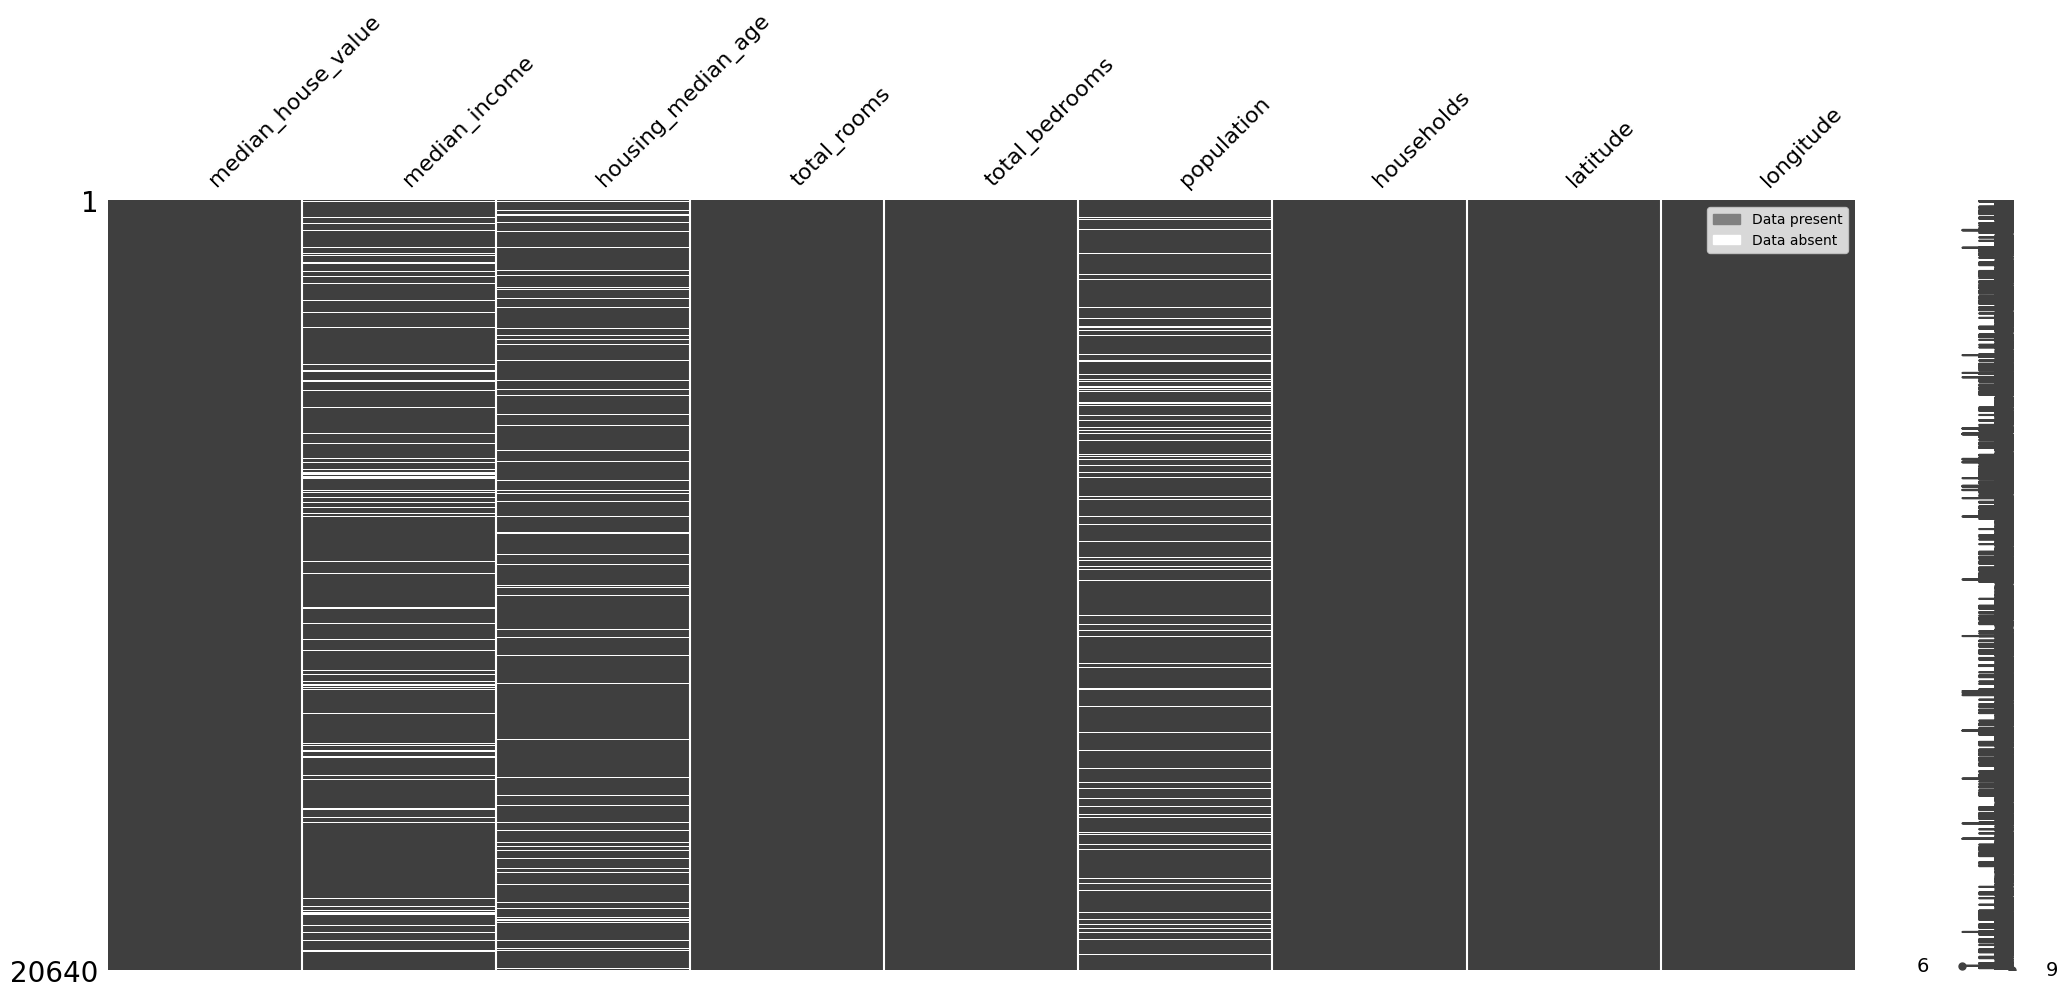

In [3]:
msno.matrix(houses_corrupted, )
gray_patch = mpatches.Patch(color='gray', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(handles=[gray_patch, white_patch])

plt.show()

In [ ]:
print(len(houses_corrupted["population"]))

20640


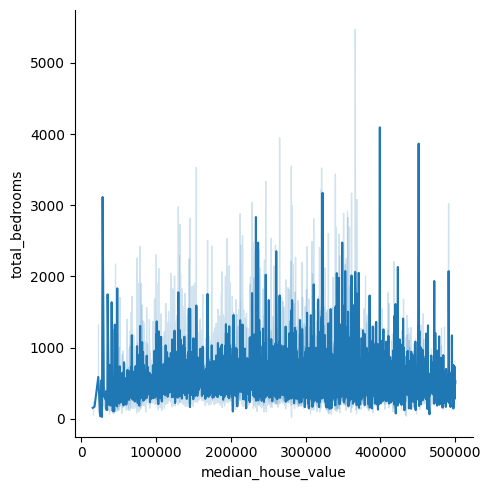

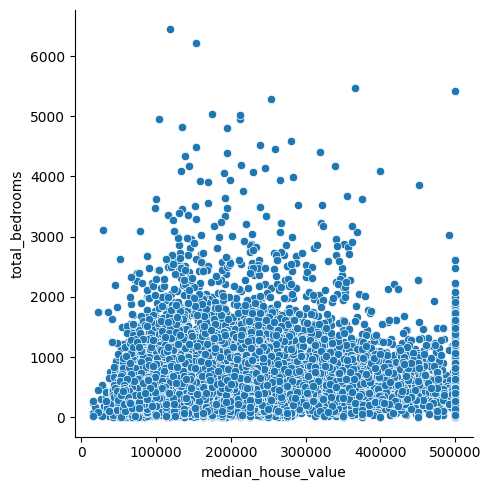

In [4]:
sns.relplot(houses_corrupted, x="median_house_value", y="total_bedrooms", kind="line")

sns.relplot(houses_corrupted, x="median_house_value", y="total_bedrooms")

<function matplotlib.pyplot.show(close=None, block=None)>

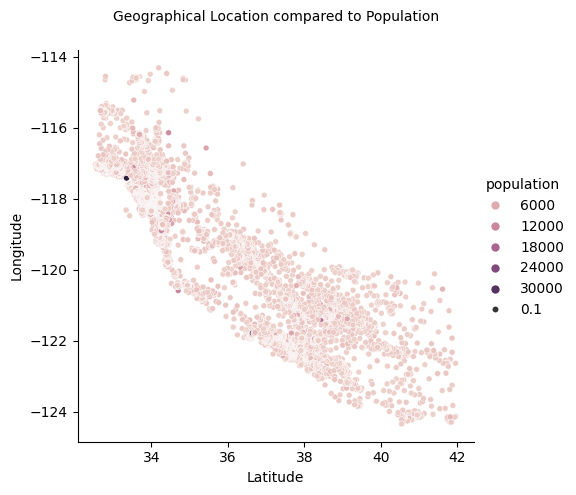

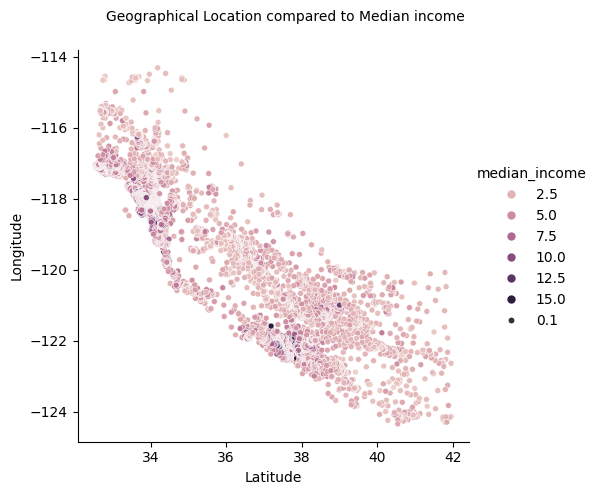

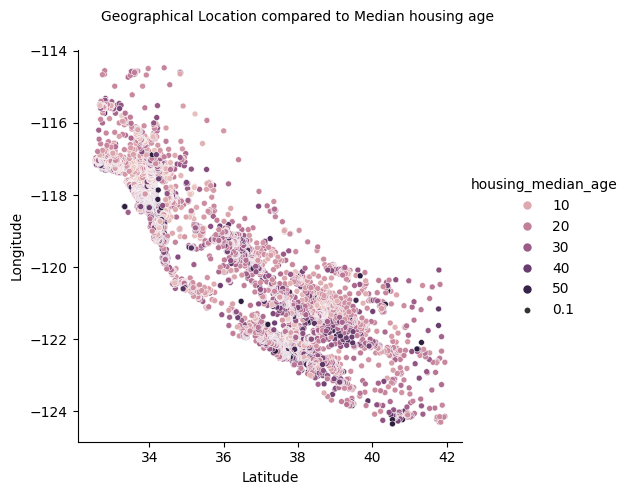

In [8]:
pop_plot = sns.relplot(houses_corrupted,x="latitude",y="longitude",hue="population", size=0.1)
pop_plot.set(xlabel='Latitude', ylabel='Longitude')
pop_plot.fig.suptitle('Geographical Location compared to Population', fontsize=10)
pop_plot.fig.subplots_adjust(top=0.9)
pop_plot.fig.tight_layout

income_plot = sns.relplot(houses_corrupted,x="latitude",y="longitude",hue="median_income", size=0.1)
income_plot.set(xlabel='Latitude', ylabel='Longitude')
income_plot.fig.suptitle('Geographical Location compared to Median income', fontsize=10)
income_plot.fig.subplots_adjust(top=0.9)
income_plot.fig.tight_layout

age_plot = sns.relplot(houses_corrupted,x="latitude",y="longitude",hue="housing_median_age", size=0.1)
age_plot.set(xlabel='Latitude', ylabel='Longitude')
age_plot.fig.suptitle('Geographical Location compared to Median housing age', fontsize=10)
age_plot.fig.subplots_adjust(top=0.9)
age_plot.fig.tight_layout

plt.show






### 2. Outlier Identification [10]
- Utilise a statistical outlier detection approach (i.e., **no** KNN, LOF, 1Class SVM)
- Utilise an algorithmic outlier detection method of your choice
- Compare results and decide what to do with identified outleirs
  - Include graphs, statistics, and written descriptions as appropriate
- Explain what you are doing, and why your analysis is appropriate
- Comment on benefits/detriments of statistical and algorithmic outlier detection approaches


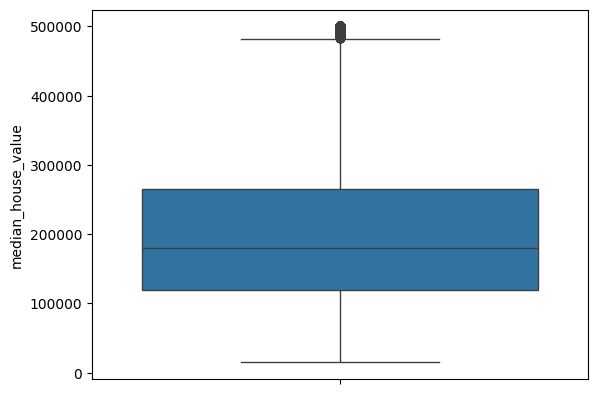

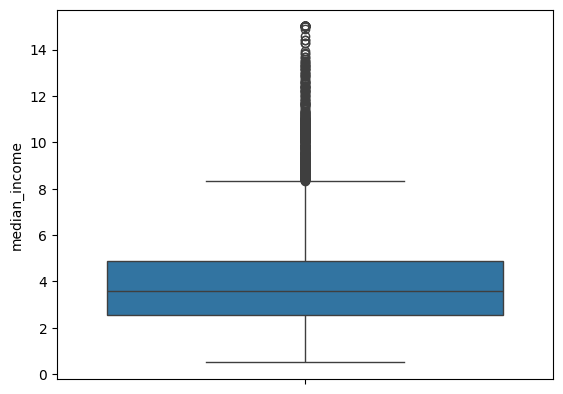

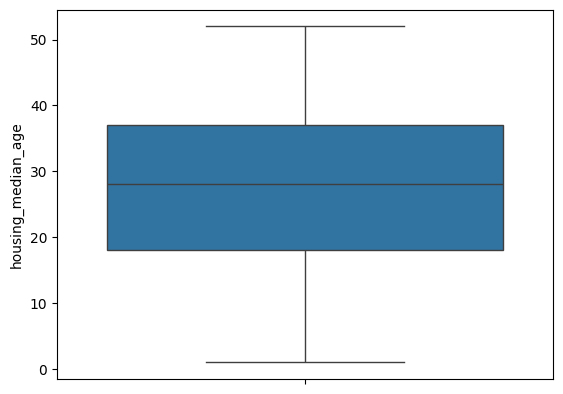

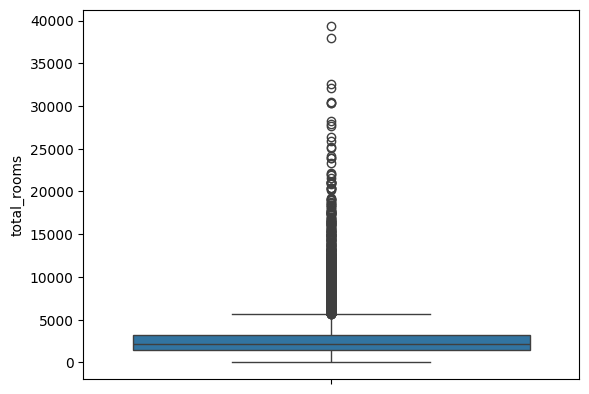

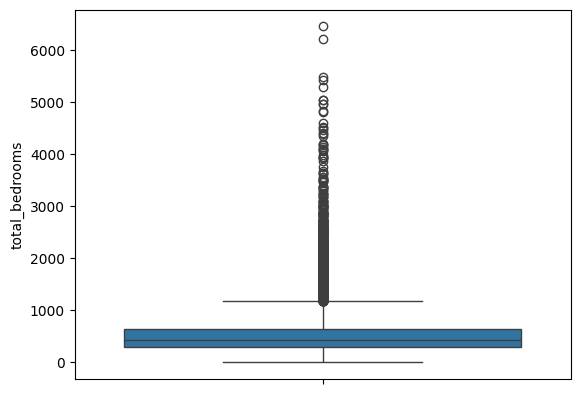

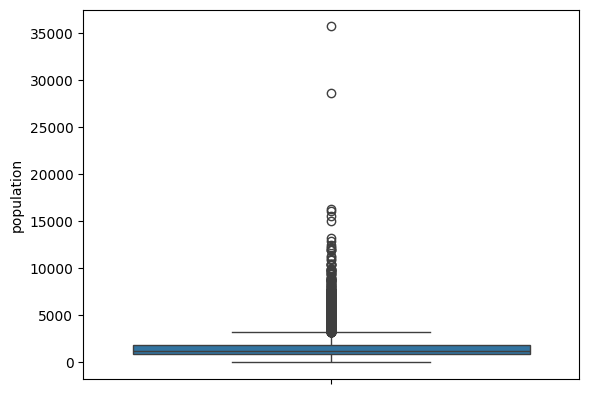

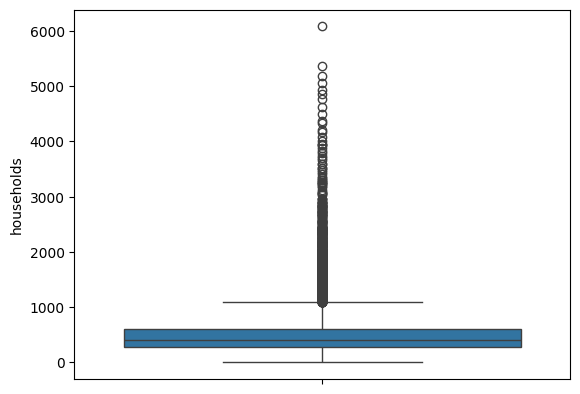

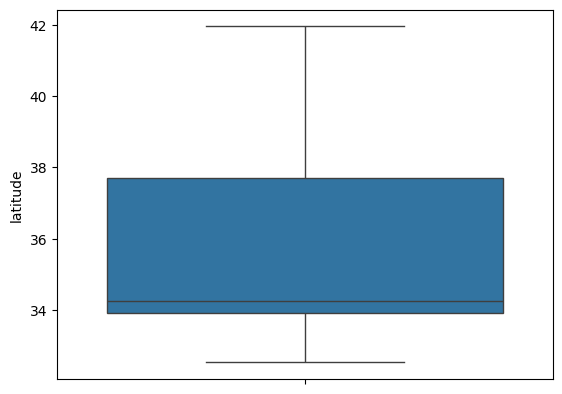

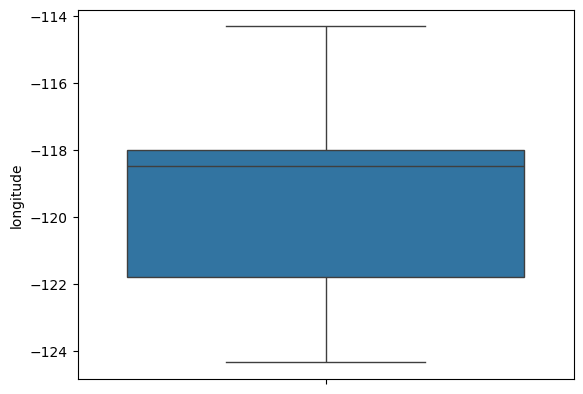

In [11]:
for col_index in range(houses_corrupted.shape[1]):
    sns.boxplot(houses_corrupted.iloc[:, col_index])
    plt.show()

In [ ]:
counter = 0
total = 0
for values in houses_corrupted["median_house_value"]:
  total = total + values
  counter +=1
print(total)
print(counter)
print(total/counter)

stand = houses_corrupted["median_house_value"].std()
mean = houses_corrupted["median_house_value"].mean()
print(stand)
print(mean)


3219809671.0
15059
213812.98034398034
119688.70450927956
213812.98034398034


213812.98034398034
119688.70450927956
6.039542478072437e-17
0.9999999999999952
Mean of median_house_value6.039542478072437e-17
Standard deviation of median_house_value0.9999999999999952


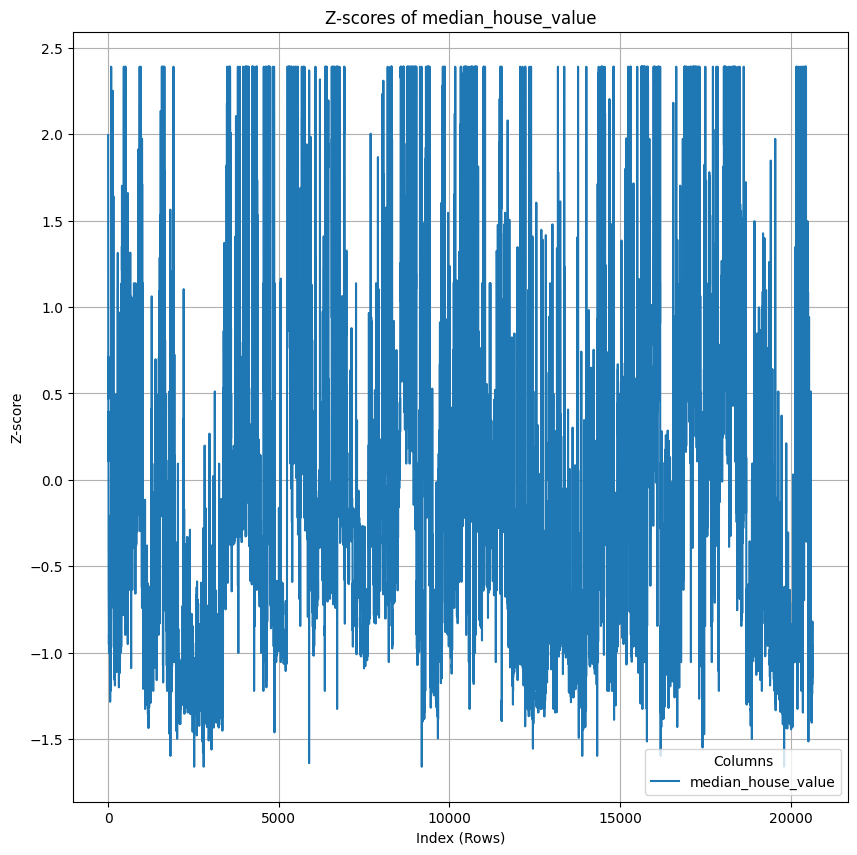

In [ ]:
#print(houses_corrupted["population"].mean())
#print(houses_corrupted["population"].std())
df = houses_corrupted
print(houses_corrupted["median_house_value"].mean())
print(houses_corrupted["median_house_value"].std())
z_scores = (df - df.mean()) / df.std()
print(z_scores["median_house_value"].mean())
print(z_scores["median_house_value"].std())

print("Mean of median_house_value" + str(z_scores["median_house_value"].mean()))
print("Standard deviation of median_house_value" + str(z_scores["median_house_value"].std()))
plt.figure(figsize=(10, 10))

plt.plot(z_scores.index, z_scores["median_house_value"], label="median_house_value")

# Customizing the plot
plt.title("Z-scores of median_house_value")
plt.xlabel("Index (Rows)")
plt.ylabel("Z-score")
plt.legend(title="Columns")
plt.grid(True)
plt.show()




542.7454014210771
412.9063739555797
6082.0
1.0


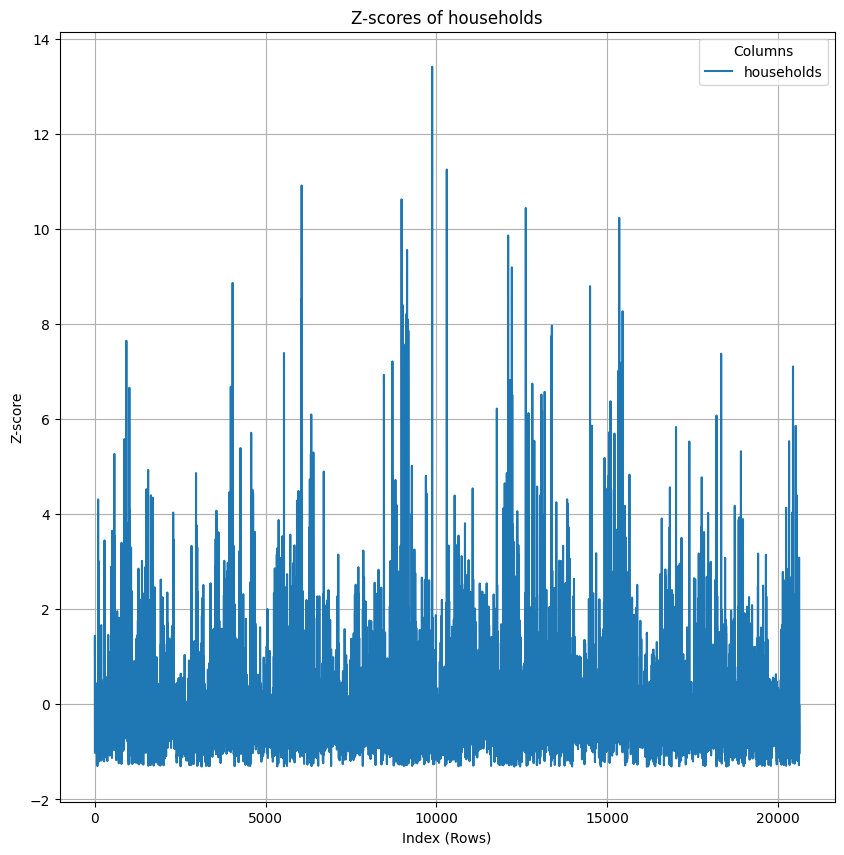

In [ ]:
print(houses_corrupted["households"].mean())
print(houses_corrupted["households"].std())
max_value = 0
for values in houses_corrupted["households"]:
    if values > max_value:
        max_value = values
print(max_value)
min_value = 1000

plt.figure(figsize=(10, 10))

plt.plot(z_scores.index, z_scores["households"], label="households")

# Customizing the plot
plt.title("Z-scores of households")
plt.xlabel("Index (Rows)")
plt.ylabel("Z-score")
plt.legend(title="Columns")
plt.grid(True)
plt.show()

    median_house_value  median_income  housing_median_age  total_rooms  \
0             452600.0         8.3252                41.0        880.0   
1             358500.0         8.3014                21.0       7099.0   
2             352100.0         7.2574                52.0       1467.0   
3             341300.0         5.6431                52.0       1274.0   
4             342200.0         3.8462                52.0       1627.0   
5             269700.0         4.0368                52.0        919.0   
6             299200.0         3.6591                52.0       2535.0   
7             241400.0         3.1200                52.0       3104.0   
8             226700.0         2.0804                42.0       2555.0   
9             261100.0         3.6912                52.0       3549.0   
10            281500.0         3.2031                 NaN       2202.0   
11            241800.0         3.2705                52.0       3503.0   
12            213500.0         3.0750 

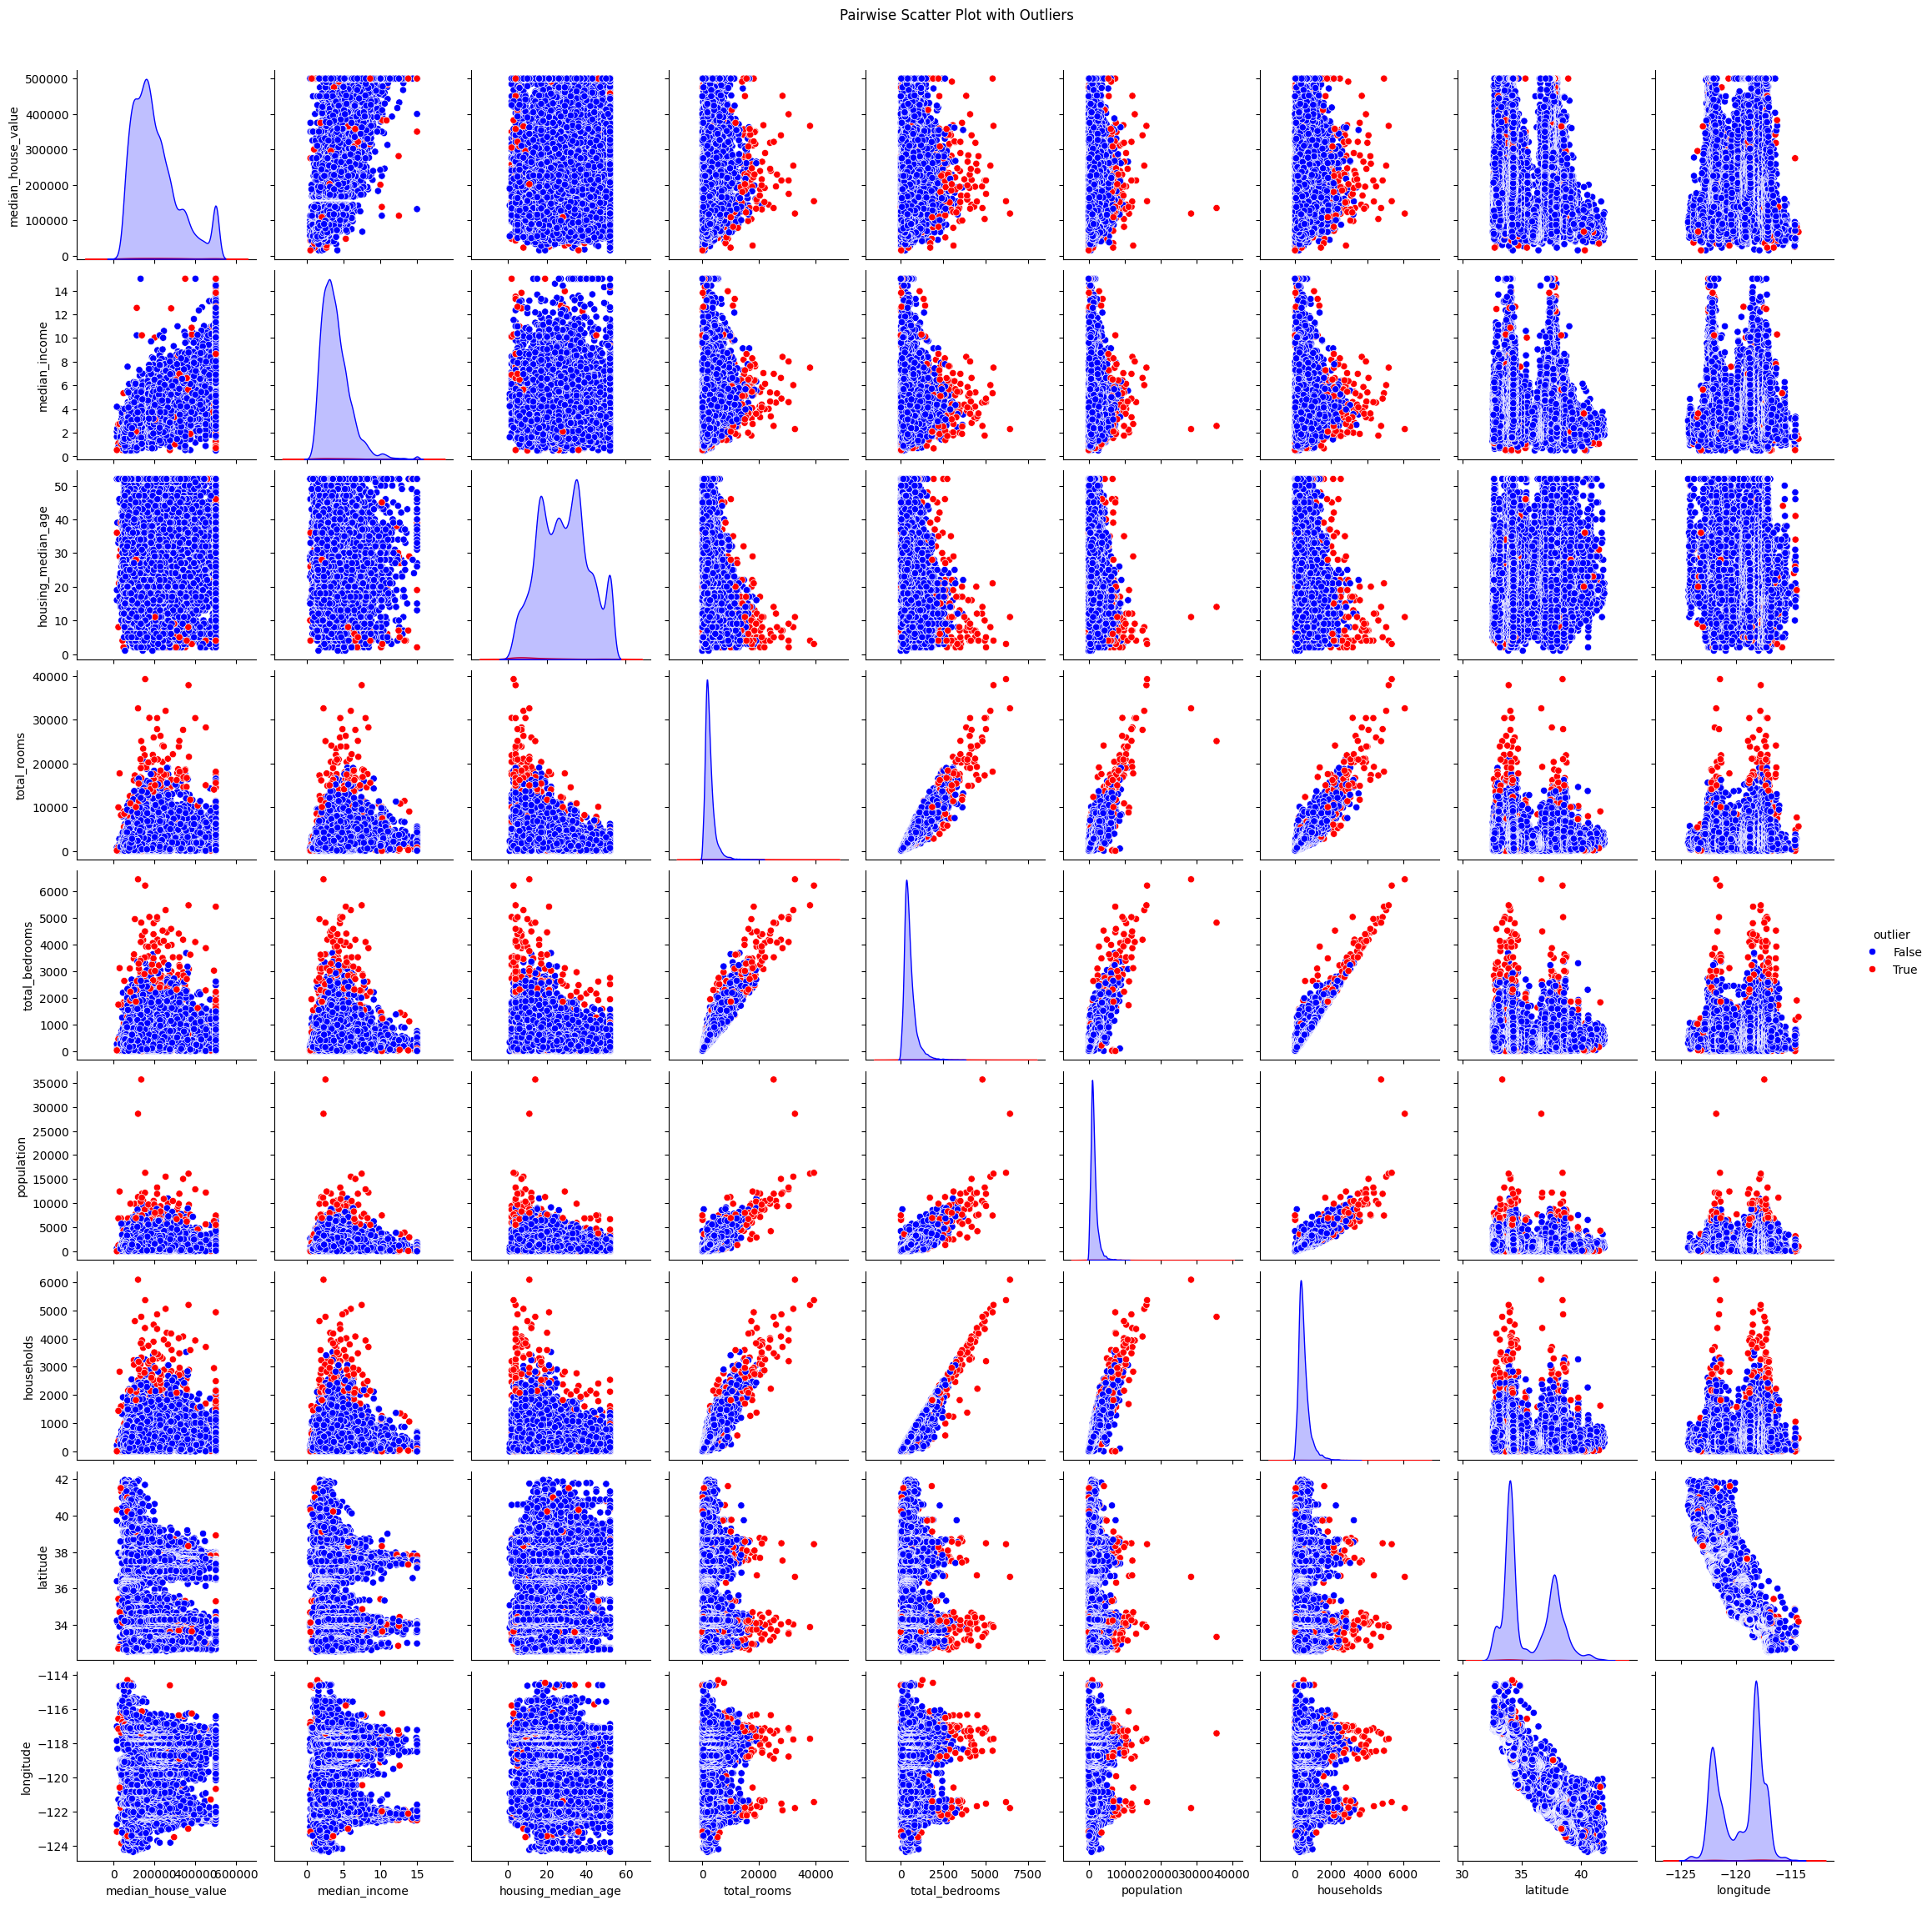

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- households
- housing_median_age
- latitude
- longitude
- median_house_value
- ...


In [14]:
cleaned_houses= houses_corrupted.loc[:,["total_bedrooms","total_rooms"]]

from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay
clf = IsolationForest(n_estimators=5, max_samples=20000, contamination=0.01)
y_pred = clf.fit_predict(houses_corrupted)
houses_corrupted["outlier"] = y_pred
houses_corrupted['outlier'] = houses_corrupted['outlier'] == -1
print(houses_corrupted.head(20))
sns.pairplot(houses_corrupted, hue='outlier', palette={True: 'red', False: 'blue'})
plt.suptitle('Pairwise Scatter Plot with Outliers', y=1.02)
plt.show()



disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    cleaned_houses,
    response_method="predict",
    alpha=0.01,
)
scatter = disp.ax_.scatter(cleaned_houses["total_bedrooms"], cleaned_houses["total_rooms"], c=y_pred, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
handles, lables = scatter.legend_elements()
plt.legend(handles = handles, labels=["outliers", "inliers"], title="Outlier Classifications")
plt.show()

### 3. Imputation [10]
- Identify which features should be imputed and which should be removed
  - Provide a written rationale for this decision
- Impute the missing records using KNN imputation
- Impute the missing records using MICE imputation
- Compare both imputed datasets feature distributions against each other and the non-imputed data
- Build a regressor on all thre datasets
  - Use regression models to predict house median price
  - Compare regressors of non-imputed data against imputed datas
  - **Note**: If you're struggling to compare against the original dataset focus on comparing the two imputed datasets against each other


In [ ]:
# Use this dataset for comparison against the imputed datasets
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [ ]:
#finding the amount of data missing from columns with missing data
print(houses_corrupted["population"].isnull().sum())
print(houses_corrupted["housing_median_age"].isnull().sum())
print(houses_corrupted["median_income"].isnull().sum())
print((houses_corrupted["housing_median_age"].isnull().sum()/len(houses_corrupted["housing_median_age"])) * 100)
print((houses_corrupted["median_income"].isnull().sum()/len(houses_corrupted["median_income"])) * 100)
print((houses_corrupted["population"].isnull().sum()/len(houses_corrupted["population"])) * 100)

2064
2064
2064
10.0
10.0
10.0


In [9]:
#create a knn imputation method using a relevant number of neighbors
knn_imputer = KNNImputer(n_neighbors=3)
#use the imputer on my corrupted data to transform any Nan values to values like neighbors
houses_knn_imputed = knn_imputer.fit_transform(houses_corrupted)
#make the imputed data the same type of dataframe as the corrupted data
houses_knn_imputed = pd.DataFrame(houses_knn_imputed, columns=houses_corrupted.columns)

print(houses_knn_imputed.head(20))
print(houses_knn_imputed.info())



    median_house_value  median_income  housing_median_age  total_rooms  \
0             452600.0       8.325200           41.000000        880.0   
1             358500.0       8.301400           21.000000       7099.0   
2             352100.0       7.257400           52.000000       1467.0   
3             341300.0       5.643100           52.000000       1274.0   
4             342200.0       3.846200           52.000000       1627.0   
5             269700.0       4.036800           52.000000        919.0   
6             299200.0       3.659100           52.000000       2535.0   
7             241400.0       3.120000           52.000000       3104.0   
8             226700.0       2.080400           42.000000       2555.0   
9             261100.0       3.691200           52.000000       3549.0   
10            281500.0       3.203100           34.333333       2202.0   
11            241800.0       3.270500           52.000000       3503.0   
12            213500.0       3.075000 

In [ ]:
#using MICE
#replace all missing values with appropriate values e.i mean values
imputer = IterativeImputer(random_state=100, max_iter=10)
imputer.fit(houses_corrupted)
houses_mice_imputed = imputer.transform(houses_corrupted)
houses_mice_imputed = pd.DataFrame(houses_mice_imputed, columns=houses_corrupted.columns)
print(houses_mice_imputed.head(20))

    median_house_value  median_income  housing_median_age  total_rooms  \
0             452600.0       8.325200           41.000000        880.0   
1             358500.0       8.301400           21.000000       7099.0   
2             352100.0       7.257400           52.000000       1467.0   
3             341300.0       5.643100           52.000000       1274.0   
4             342200.0       3.846200           52.000000       1627.0   
5             269700.0       4.036800           52.000000        919.0   
6             299200.0       3.659100           52.000000       2535.0   
7             241400.0       3.120000           52.000000       3104.0   
8             226700.0       2.080400           42.000000       2555.0   
9             261100.0       3.691200           52.000000       3549.0   
10            281500.0       3.203100           35.525335       2202.0   
11            241800.0       3.270500           52.000000       3503.0   
12            213500.0       3.075000 

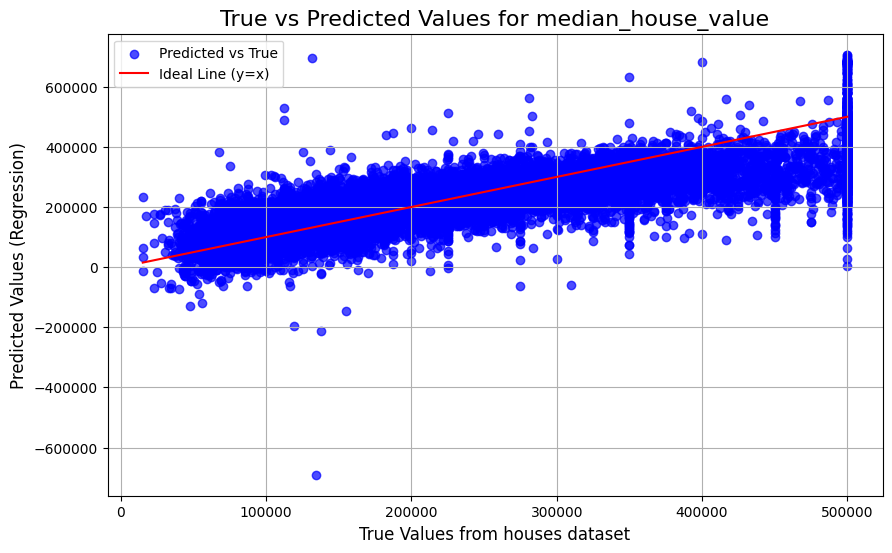

In [ ]:
#building a linear regression model to compare the imputed data
#, houses_mice_imputed.drop('median_house_value', axis=1),houses.drop('median_house_value', axis=1)
X = pd.concat([houses_knn_imputed.drop('median_house_value', axis=1)], axis=1)
y = houses['median_house_value']
regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs True', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Ideal Line (y=x)')

plt.title('True vs Predicted Values for median_house_value', fontsize=16)
plt.xlabel('True Values from houses dataset', fontsize=12)
plt.ylabel('Predicted Values (Regression)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()







### 4. Conclusions & Throughts [3]
- Disucss methods used for anomaly detection, pros/cons of each method
- Disucss challenges/difficulties in anomaly detection implementation
- Discuss methods used for imputation, pros/cons of each method
- Discuss challenges/difficulties in imputation implementation